## 1. Importing libraries and loading dataset
- the dataset is in SQLite3 form

In [1]:
# importing the neccessary libraries

# Tensorflow and Keras library
###############################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, LSTM, Dense, Dropout
from keras.regularizers import l2 #regularization function
from tensorflow.keras.optimizers import Adam  #perform gradient descent
from tensorflow.math import reduce_prod
print(tf.__version__)
###############################################################
# Supporting libraries
###############################################################
import pandas as pd #used to read dataset and preform dataframe operations
import numpy as np  # perform basic array operations
import sqlite3      # our raw data is in SQLite form
import matplotlib.pyplot as plt #matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder #s scaler is for normalizing data and label encoder is to label.

np.version.version

###############################################################


2.5.0


'1.20.3'

In [2]:
np.__version__

'1.20.3'

In [3]:
pd.__version__

'1.3.1'

### 1.1 Import the dataset (SQLite file)

In [4]:
file = open('TESTDATA_real.db')   ##open the file 
conn = sqlite3.connect('TESTDATA_real.db')  ## create the cursor pointing to the table
df = pd.read_sql_query('SELECT * FROM SENSOR_TABLE', conn) #create pandas dataframe so we can manipulate
df.insert(0, 'unit', range(1, 1+len(df))) # add unit column
df.head() # first 5 data

,unit,TIME,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,CURRENT_SPEED,ACTIVITY
0,1,09:54:08,0.028730,9.651326,-0.098162,-0.001145,0.001833,0.000611,0.0,Right
1,2,09:54:08,0.028730,9.651326,-0.098162,-0.001145,0.001833,0.000611,0.0,Right
2,3,09:54:08,0.122104,9.646538,-0.663194,-0.001145,0.000000,-0.000611,0.0,Right
3,4,09:54:08,0.122104,9.646538,-0.663194,-0.001145,0.000000,-0.000611,0.0,Right
4,5,09:54:08,0.112527,9.639356,-0.962469,-0.001145,0.000000,-0.000611,0.0,Right


In [5]:
df.shape ## 10 data column 6448 rows down

(6448, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unit           6448 non-null   int64  
 1   TIME           6448 non-null   object 
 2   ACCEL_X        6448 non-null   float64
 3   ACCEL_Y        6448 non-null   float64
 4   ACCEL_Z        6448 non-null   float64
 5   GYRO_X         6448 non-null   float64
 6   GYRO_Y         6448 non-null   float64
 7   GYRO_Z         6448 non-null   float64
 8   CURRENT_SPEED  6448 non-null   float64
 9   ACTIVITY       6448 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 503.9+ KB


In [7]:
df.tail() # list last 5 data

,unit,TIME,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,CURRENT_SPEED,ACTIVITY
6443,6444,10:18:39,0.251391,9.988909,0.172383,0.010461,0.000611,0.000000,0.0,Brake
6444,6445,10:18:39,0.263362,9.890746,-0.387861,-0.009697,0.000000,-0.000611,0.0,Brake
6445,6446,10:18:39,0.263362,9.890746,-0.387861,-0.009697,0.000000,-0.000611,0.0,Brake
6446,6447,10:18:39,0.014365,9.522039,-1.103727,0.004963,0.000611,0.000000,0.0,Brake
6447,6448,10:18:39,0.014365,9.522039,-1.103727,0.004963,0.000611,0.000000,0.0,Brake


In [8]:
df.isnull().sum()  #check for NULL values

unit             0
TIME             0
ACCEL_X          0
ACCEL_Y          0
ACCEL_Z          0
GYRO_X           0
GYRO_Y           0
GYRO_Z           0
CURRENT_SPEED    0
ACTIVITY         0
dtype: int64

In [9]:
df['ACTIVITY'].value_counts()

Left          1692
Accelerate    1668
Right         1658
Brake         1430
Name: ACTIVITY, dtype: int64

## 2 Visualizing the data

### 2.1 Accelerometer plots

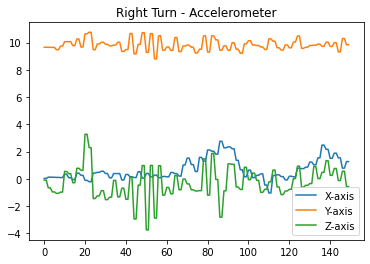

In [10]:
# Accelerometer plot 
%matplotlib inline
# RIGHT TURN 
plt.plot(np.arange(0,150), df.ACCEL_X[df['ACTIVITY']=="Right"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Y[df['ACTIVITY']=="Right"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Z[df['ACTIVITY']=="Right"][:150],  label = 'Z-axis' )
plt.title("Right Turn - Accelerometer")
plt.legend()


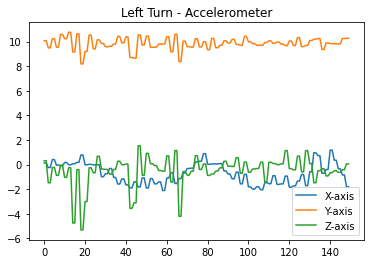

In [11]:
# LEFT TURN
plt.plot(np.arange(0,150), df.ACCEL_X[df['ACTIVITY']=="Left"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Y[df['ACTIVITY']=="Left"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Z[df['ACTIVITY']=="Left"][:150],  label = 'Z-axis' )
plt.title("Left Turn - Accelerometer")
plt.legend()

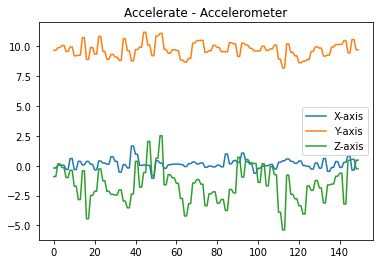

In [12]:
# ACCELERATION
plt.plot(np.arange(0,150), df.ACCEL_X[df['ACTIVITY']=="Accelerate"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Y[df['ACTIVITY']=="Accelerate"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Z[df['ACTIVITY']=="Accelerate"][:150],  label = 'Z-axis' )
plt.title("Accelerate - Accelerometer")
plt.legend()

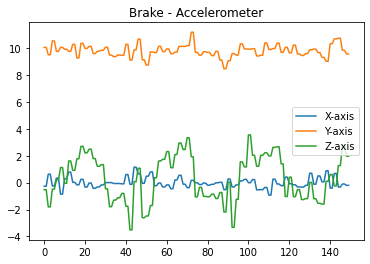

In [13]:
# BRAKING
plt.plot(np.arange(0,150), df.ACCEL_X[df['ACTIVITY']=="Brake"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Y[df['ACTIVITY']=="Brake"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.ACCEL_Z[df['ACTIVITY']=="Brake"][:150],  label = 'Z-axis' )
plt.title("Brake - Accelerometer")
plt.legend()

### 2.2 Gyroscope plots

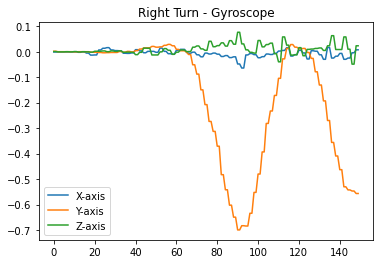

In [14]:
# Gyroscope plot

# RIGHT TURN 
plt.plot(np.arange(0,150), df.GYRO_X[df['ACTIVITY']=="Right"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.GYRO_Y[df['ACTIVITY']=="Right"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.GYRO_Z[df['ACTIVITY']=="Right"][:150],  label = 'Z-axis' )
plt.title("Right Turn - Gyroscope")
plt.legend()


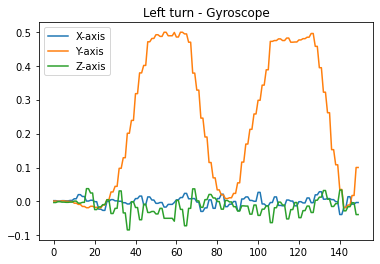

In [15]:
# LEFT TURN
plt.plot(np.arange(0,150), df.GYRO_X[df['ACTIVITY']=="Left"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.GYRO_Y[df['ACTIVITY']=="Left"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.GYRO_Z[df['ACTIVITY']=="Left"][:150],  label = 'Z-axis' )
plt.title("Left turn - Gyroscope")
plt.legend()

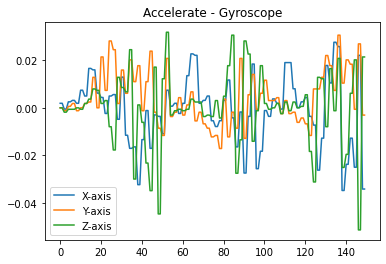

In [16]:
# ACCELERATE
plt.plot(np.arange(0,150), df.GYRO_X[df['ACTIVITY']=="Accelerate"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.GYRO_Y[df['ACTIVITY']=="Accelerate"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.GYRO_Z[df['ACTIVITY']=="Accelerate"][:150],  label = 'Z-axis' )
plt.title("Accelerate - Gyroscope")
plt.legend()

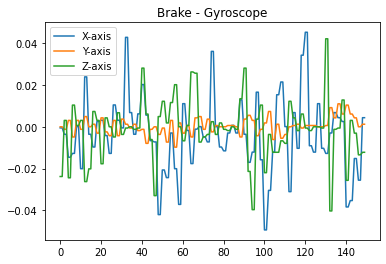

In [17]:
# BRAKE
plt.plot(np.arange(0,150), df.GYRO_X[df['ACTIVITY']=="Brake"][:150],  label = 'X-axis' )
plt.plot(np.arange(0,150), df.GYRO_Y[df['ACTIVITY']=="Brake"][:150],  label = 'Y-axis' )
plt.plot(np.arange(0,150), df.GYRO_Z[df['ACTIVITY']=="Brake"][:150],  label = 'Z-axis' )
plt.title("Brake - Gyroscope")
plt.legend()

In [18]:
df['ACTIVITY'].value_counts().index

Index(['Left', 'Accelerate', 'Right', 'Brake'], dtype='object')

## 3 Pre-processing

### Splitting data and labels

In [19]:
X_train = df[df.columns[2:11]]
X_train

,ACCEL_X,ACCEL_Y,ACCEL_Z,GYRO_X,GYRO_Y,GYRO_Z,CURRENT_SPEED,ACTIVITY
0,0.028730,9.651326,-0.098162,-0.001145,0.001833,0.000611,0.0,Right
1,0.028730,9.651326,-0.098162,-0.001145,0.001833,0.000611,0.0,Right
2,0.122104,9.646538,-0.663194,-0.001145,0.000000,-0.000611,0.0,Right
3,0.122104,9.646538,-0.663194,-0.001145,0.000000,-0.000611,0.0,Right
4,0.112527,9.639356,-0.962469,-0.001145,0.000000,-0.000611,0.0,Right
...,...,...,...,...,...,...,...,...
6443,0.251391,9.988909,0.172383,0.010461,0.000611,0.000000,0.0,Brake
6444,0.263362,9.890746,-0.387861,-0.009697,0.000000,-0.000611,0.0,Brake
6445,0.263362,9.890746,-0.387861,-0.009697,0.000000,-0.000611,0.0,Brake
6446,0.014365,9.522039,-1.103727,0.004963,0.000611,0.000000,0.0,Brake


In [20]:
X_train.shape

(6448, 8)

In [21]:
y_train = df[df.columns[10:11]]
y_train

""
0
1
2
3
4
...
6443
6444
6445
6446


In [22]:
y_train.shape

(6448, 0)

In [23]:
y_train

""
0
1
2
3
4
...
6443
6444
6445
6446


In [24]:
X_train.shape

(6448, 8)

### Create time series

In [25]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 50
STEP = 6

X_train, y_train = create_dataset(
    X_train[['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z']], 
    X_train.ACTIVITY, 
    TIME_STEPS, 
    STEP
)



In [26]:
X_train.shape, y_train.shape

((1067, 50, 6), (1067, 1))

In [27]:
y_train

array([['Right'],
       ['Right'],
       ['Right'],
       ...,
       ['Brake'],
       ['Brake'],
       ['Brake']], dtype='<U10')

In [28]:
print(y_train)

[['Right']
 ['Right']
 ['Right']
 ...
 ['Brake']
 ['Brake']
 ['Brake']]


In [29]:
X_train.shape

(1067, 50, 6)

## One hot encoding

In [30]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)
y_train = enc.transform(y_train)


In [31]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [32]:
print(X_train.shape, y_train.shape)

(1067, 50, 6) (1067, 4)


In [33]:
enc.categories_[0]

array(['Accelerate', 'Brake', 'Left', 'Right'], dtype='<U10')

In [34]:
enc.sparse

False

In [35]:
print(y_train)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [36]:
print(enc.categories_[0])

['Accelerate' 'Brake' 'Left' 'Right']


#### 1.4.4 Split into training data and validation data  !!!! try use train test split keras

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train )

In [38]:
print(X_train.shape, y_train.shape)

(746, 50, 6) (746, 4)


In [39]:
len(np.unique(y_train))

2

In [40]:
y_train.ndim

2

In [41]:
y_test.ndim

2

#### The labels are encoded as follows:
- [0,0,0,1] = Right
- [0,0,1,0] = Left
- [0,1,0,0] = Brake
- [1,0,0,0] = Accelerate

## Scaling
-StandardScale() will make the:
- mean = 0
- variance = 1

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

how to make 3d input inside standard scaler:
https://newbedev.com/how-to-standard-scale-a-3d-matrix

In [42]:
scaler = StandardScaler()
# standardscaler only accept 2D, so we need to convert it into 3D then back to 3D
# we only use fit_transform() on training data, so that it will remember the mean and std deviation which will be used in the testing set
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)  

In [43]:
X_train_scaled.shape  #back to 3D

(746, 50, 6)

In [44]:
scaler.mean_

array([-9.66795543e-04,  9.80119899e+00, -2.42860247e-01, -4.09775121e-03,
        2.30926722e-03, -1.42478996e-03])

In [45]:
X_train.shape

(746, 50, 6)

In [46]:
print(X_train.mean(axis = 0))

[[-2.20035490e-02  9.78139953e+00 -2.02239437e-01 -4.23572813e-03
  -2.88400432e-03 -1.72942012e-03]
 [-2.20035490e-02  9.78139953e+00 -2.02239437e-01 -4.23900354e-03
  -2.88727973e-03 -1.68602084e-03]
 [ 1.54050490e-03  9.80292487e+00 -2.31753749e-01 -4.31433815e-03
  -1.70567337e-03 -9.86719314e-04]
 [ 1.54050490e-03  9.80292487e+00 -2.31753749e-01 -4.48384097e-03
  -1.78018911e-03 -1.13247536e-03]
 [-1.08637704e-02  9.83823453e+00 -2.11979923e-01 -3.74523449e-03
  -8.92550981e-04 -1.79247186e-03]
 [-1.08637704e-02  9.83823453e+00 -2.11979923e-01 -3.82138793e-03
  -7.89375322e-04 -1.69011508e-03]
 [-4.24922681e-02  9.78131607e+00 -2.37254236e-01 -4.32907750e-03
   1.41825556e-03 -2.19043503e-03]
 [-4.24922681e-02  9.78131607e+00 -2.37254236e-01 -4.32170781e-03
   1.43135724e-03 -2.20189900e-03]
 [-1.61400002e-02  9.80883334e+00 -2.42587834e-01 -4.32416441e-03
   2.71613945e-03 -1.06860473e-03]
 [-1.61400002e-02  9.80883334e+00 -2.42587834e-01 -4.52232713e-03
   2.76281414e-03 -1.2004

In [47]:
X_train_scaled

array([[[-1.73691452e-01, -1.72058098e-01,  2.34306713e-01,
         -1.39951591e+00,  2.20522082e-01, -6.69991927e-02],
        [-1.73691452e-01, -1.72058098e-01,  2.34306713e-01,
         -1.39951591e+00,  2.20522082e-01, -6.69991927e-02],
        [ 6.49969579e-01,  1.17835238e+00,  7.62003869e-01,
          4.36276370e-01,  1.16010689e-02, -1.67463308e-01],
        ...,
        [-3.62496261e-01,  9.76880935e-01, -1.92786303e-01,
         -5.15615899e-01,  7.15594121e-03, -5.19087715e-01],
        [ 6.99530853e-01, -2.86408457e-01, -4.20569257e-01,
         -1.26353131e+00,  1.82687622e-02, -7.70248016e-01],
        [ 6.99530853e-01, -2.86408457e-01, -4.20569257e-01,
         -1.26353131e+00,  1.82687622e-02, -7.70248016e-01]],

       [[ 1.34146719e+00,  3.18010222e-01,  1.32197029e+00,
         -1.60349286e+00, -1.25303785e+00, -8.95828167e-01],
        [ 1.34146719e+00,  3.18010222e-01,  1.32197029e+00,
         -1.60349286e+00, -1.25303785e+00, -8.95828167e-01],
        [ 2.45541

In [48]:
print(X_train_scaled.mean(axis=0))

[[-0.02073677 -0.04503055  0.03220533 -0.00767875 -0.01889513 -0.01252502]
 [-0.02073677 -0.04503055  0.03220533 -0.00786104 -0.01890705 -0.01074064]
 [ 0.00247155  0.00392522  0.00880555 -0.0120536  -0.01460791  0.01801149]
 [ 0.00247155  0.00392522  0.00880555 -0.02148684 -0.01487902  0.01201866]
 [-0.00975584  0.0842311   0.0244828   0.01961842 -0.01164945 -0.01511742]
 [-0.00975584  0.0842311   0.0244828   0.0153803  -0.01127406 -0.01090897]
 [-0.04093332 -0.04522035  0.0044446  -0.01287388 -0.00324185 -0.03147988]
 [-0.04093332 -0.04522035  0.0044446  -0.01246374 -0.00319418 -0.03195123]
 [-0.01495683  0.01736304  0.00021598 -0.01260045  0.00148036  0.01464473]
 [-0.01495683  0.01736304  0.00021598 -0.02362869  0.00165018  0.00922425]
 [-0.01089791  0.08301212  0.02776774  0.03215052  0.0069027   0.00484746]
 [-0.01089791  0.08301212  0.02776774  0.02873267  0.00730789  0.00942625]
 [-0.05221795 -0.08008863 -0.01916574  0.04222177  0.01452079 -0.04565394]
 [-0.05221795 -0.08008863

In [49]:
print(X_train_scaled.std(axis = 0))

[[0.99003579 0.99421657 0.95896616 1.03908338 1.01138777 0.99208408]
 [0.99003579 0.99421657 0.95896616 1.0391009  1.01138775 0.99191672]
 [1.00905402 1.05106109 1.04489979 1.00446655 1.00507414 1.03405625]
 [1.00905402 1.05106109 1.04489979 1.00836567 1.00530754 1.03196417]
 [1.00036155 1.0202067  0.98993738 0.97283473 1.00366037 0.99648565]
 [1.00036155 1.0202067  0.98993738 0.97465151 1.00290797 0.9978889 ]
 [1.00558864 0.97633112 0.99053622 1.03065736 1.00381104 1.01257265]
 [1.00558864 0.97633112 0.99053622 1.03062632 1.00389596 1.01355898]
 [0.98705479 1.00009992 1.00949451 0.97482249 1.0007473  1.01836133]
 [0.98705479 1.00009992 1.00949451 0.97911111 1.00074772 1.01702981]
 [0.98684    0.99312401 0.96419992 0.96888081 0.9990446  0.99370595]
 [0.98684    0.99312401 0.96419992 0.97110436 0.99828134 0.99509846]
 [0.9961535  1.01162018 1.00205236 1.00060831 0.99878288 0.99707244]
 [0.9961535  1.01162018 1.00205236 1.00055376 0.99886739 0.99806739]
 [0.99308007 1.02416987 1.03243432

In [50]:
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [51]:
X_test_scaled.shape

(321, 50, 6)

In [52]:
print(X_test_scaled.mean(axis=0))

[[-0.00095857 -0.08820927 -0.11907691  0.00417573  0.02676436 -0.04188317]
 [-0.00095857 -0.08820927 -0.11907691  0.0051289   0.02687514 -0.04297857]
 [ 0.02620786  0.03652165 -0.07061611  0.06390729  0.01432908  0.01750333]
 [ 0.02620786  0.03652165 -0.07061611  0.06390729  0.01432908  0.01750333]
 [ 0.09437022  0.01072056 -0.05624663 -0.03564531  0.00456641  0.09488574]
 [ 0.09437022  0.01072056 -0.05624663 -0.03564531  0.00456641  0.09488574]
 [ 0.04636763 -0.08999035 -0.06091819  0.01656685 -0.00951675  0.00161999]
 [ 0.04636763 -0.08999035 -0.06091819  0.01614323 -0.00954445  0.00576687]
 [ 0.06762287  0.00230678 -0.05388276  0.06020054 -0.0229006   0.02360629]
 [ 0.06762287  0.00230678 -0.05388276  0.06390729 -0.02392534  0.02227616]
 [ 0.09732581  0.01911739 -0.06091819 -0.06932374 -0.0384724   0.04598382]
 [ 0.09732581  0.01911739 -0.06091819 -0.07123007 -0.03854164  0.04512314]
 [ 0.07234299 -0.00361348 -0.00351121 -0.11592283 -0.05072766  0.03565573]
 [ 0.07234299 -0.00361348

In [53]:
print(X_test.mean(axis=0))

[[-1.93923015e-03  9.76241430e+00 -3.93052778e-01 -4.02271888e-03
   9.66537224e-03 -2.44346099e-03]
 [-1.93923015e-03  9.76241430e+00 -3.93052778e-01 -4.00559182e-03
   9.69582038e-03 -2.47010309e-03]
 [ 2.56201955e-02  9.81725718e+00 -3.31928842e-01 -2.94942300e-03
   6.24757184e-03 -9.99078686e-04]
 [ 2.56201955e-02  9.81725718e+00 -3.31928842e-01 -2.94942300e-03
   6.24757184e-03 -9.99078686e-04]
 [ 9.47686216e-02  9.80591271e+00 -3.13804513e-01 -4.73824954e-03
   3.56433230e-03  8.82995273e-04]
 [ 9.47686216e-02  9.80591271e+00 -3.13804513e-01 -4.73824954e-03
   3.56433230e-03  8.82995273e-04]
 [ 4.60716019e-02  9.76163117e+00 -3.19696785e-01 -3.80006708e-03
  -3.06384010e-04 -1.38538911e-03]
 [ 4.60716019e-02  9.76163117e+00 -3.19696785e-01 -3.80767911e-03
  -3.13996038e-04 -1.28452974e-03]
 [ 6.76343321e-02  9.80221326e+00 -3.10822945e-01 -3.01602823e-03
  -3.98489690e-03 -8.50644166e-04]
 [ 6.76343321e-02  9.80221326e+00 -3.10822945e-01 -2.94942299e-03
  -4.26654194e-03 -8.8299

In [54]:
print(X_test_scaled.std(axis=0))

[[1.00452509 0.99031489 1.02207891 0.998118   0.97627642 0.99053266]
 [1.00452509 0.99031489 1.02207891 0.99802697 0.97647593 0.99286243]
 [1.00287348 0.9478526  0.97597252 0.91315594 0.98549693 0.95786853]
 [1.00287348 0.9478526  0.97597252 0.91315594 0.98549693 0.95786853]
 [0.98949083 0.91000021 0.97231808 0.97184616 0.99042051 0.98527446]
 [0.98949083 0.91000021 0.97231808 0.97184616 0.99042051 0.98527446]
 [0.96538464 1.03216926 0.96226772 1.0180377  0.99500426 0.94102103]
 [0.96538464 1.03216926 0.96226772 1.01808931 0.99500448 0.94054336]
 [1.05066858 1.07096928 1.06269582 0.98841193 0.99576652 0.99660133]
 [1.05066858 1.07096928 1.06269582 0.98745627 0.99629758 0.99469148]
 [1.02030043 0.98024673 1.02994029 0.98104274 1.00058071 0.99640975]
 [1.02030043 0.98024673 1.02994029 0.98005793 1.00057848 0.99627917]
 [0.98503987 0.94940493 0.93501846 1.07991641 1.00522961 0.97704484]
 [0.98503987 0.94940493 0.93501846 1.07991309 1.00522869 0.97644026]
 [1.03232054 1.02168972 1.01092869

In [55]:
X_train_scaled

array([[[-1.73691452e-01, -1.72058098e-01,  2.34306713e-01,
         -1.39951591e+00,  2.20522082e-01, -6.69991927e-02],
        [-1.73691452e-01, -1.72058098e-01,  2.34306713e-01,
         -1.39951591e+00,  2.20522082e-01, -6.69991927e-02],
        [ 6.49969579e-01,  1.17835238e+00,  7.62003869e-01,
          4.36276370e-01,  1.16010689e-02, -1.67463308e-01],
        ...,
        [-3.62496261e-01,  9.76880935e-01, -1.92786303e-01,
         -5.15615899e-01,  7.15594121e-03, -5.19087715e-01],
        [ 6.99530853e-01, -2.86408457e-01, -4.20569257e-01,
         -1.26353131e+00,  1.82687622e-02, -7.70248016e-01],
        [ 6.99530853e-01, -2.86408457e-01, -4.20569257e-01,
         -1.26353131e+00,  1.82687622e-02, -7.70248016e-01]],

       [[ 1.34146719e+00,  3.18010222e-01,  1.32197029e+00,
         -1.60349286e+00, -1.25303785e+00, -8.95828167e-01],
        [ 1.34146719e+00,  3.18010222e-01,  1.32197029e+00,
         -1.60349286e+00, -1.25303785e+00, -8.95828167e-01],
        [ 2.45541

In [56]:
X_train_scaled.shape[2]

6

### 3. Building LSTM Model

####  3.1 Setting up the layers

In [57]:
%%time
# Building the Model
model = Sequential()

model.add(LSTM(32, return_sequences = True, input_shape = (X_train_scaled.shape[1],X_train_scaled.shape[2]),
              kernel_regularizer = l2(0.00001), bias_regularizer = l2(0.00001), name = 'LSTM_1st_layer'))
model.add(Dropout(0.5, name = 'Dropout_1'))
model.add(Flatten(name = 'Flatten_2nd_layer'))
model.add(Dropout(0.5, name = 'Dropout_2'))
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.00001), bias_regularizer = l2(0.00001), name = 'Dense_3rd_layer'))
model.add(Dropout(0.1, name = 'Dropout_3'))
model.add(Dense(4, activation='softmax',
               kernel_regularizer=l2(0.00001), bias_regularizer = l2(0.00001), name = 'Dense_Output_Layer'))
model.summary()



NotImplementedError: Cannot convert a symbolic Tensor (LSTM_1st_layer/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

####  3.2 Compiling the LSTM layers

In [58]:
# compiling the model
model.compile( loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'] )


####  3.3 Calling callbacks to use ModelCheckpoint() to save the best performing iteration/epoch

In [59]:
# preparing callbacks
from keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint('model.h5', save_weights_only=False, save_best_only=True, verbose =1 )]

####  3.4 Fitting Model using model.fit()

In [60]:
%%time
# Fitting the model
history = model.fit(X_train_scaled, y_train, epochs= 20, batch_size = 128, validation_data=(X_test_scaled,y_test), shuffle=False)

Epoch 1/20


ValueError: in user code:

    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Anaconda\envs\tensorflow25py38\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 4) and (None, 50, 6) are incompatible


In [61]:
history.history

NameError: name 'history' is not defined

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
 plot_learningCurve(history,20)

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


#y_pred = model.predict_classes(X_test)
#mat = confusion_matrix(y_test, y_pred)

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

y_pred = model.predict_classes(X_test_scaled)
mat = confusion_matrix(rounded_labels, y_pred)

plot_confusion_matrix(conf_mat=mat)

In [ ]:
enc.categories_[0]

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(rounded_labels, y_pred_bool))

![](f1score.PNG)

In [ ]:
enc.categories_[0]

## Saving the model

In [ ]:
# Write out the Keras save file
keras_file = "driver_profiler_deploy_test2.h5"
model.save(keras_file)

In [ ]:
TF_LITE_NAME = "driver_profiler_deploy_test.tflite"

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
